# Make figures for paper on geometric images

## Authors:
- **David W. Hogg** (NYU) (MPIA) (Flatiron)
- **Soledad Villar** (JHU)

## To-do items and bugs:
- Make plots (and maybe a LaTeX table) that illustrate the group B_d.
- Figure out a better way to plot in `D=3`.

In [1]:
import itertools as it
import time
import numpy as np
import finufft
import matplotlib.pyplot as plt

import jax.numpy as jnp
from jax import random

import geometricconvolutions.geometric as geom
import geometricconvolutions.utils as utils

%load_ext autoreload
%autoreload 2

In [2]:
D = 2
group_operators = geom.make_all_operators(D)
dpi = 300
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'STIXGeneral'

# set save_plots to true and specify the save folder to save the images as pdfs
save_plots = False 
save_folder = '../../images/paper_images/'

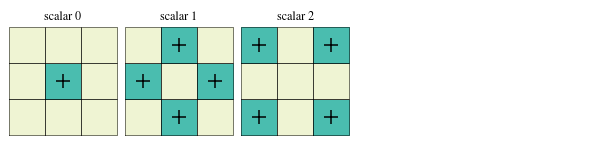

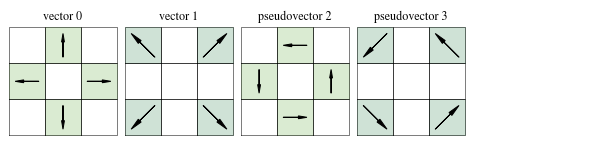

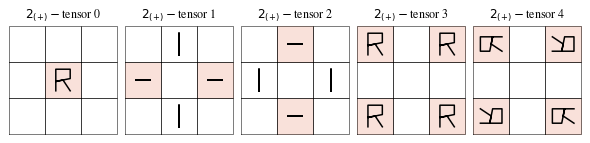

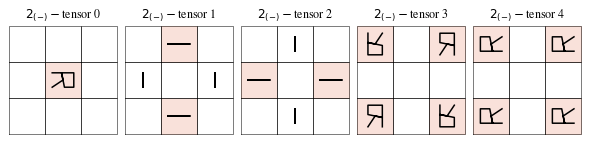

In [3]:
# Plot the 3x3 filters of tensor order 0,1,2 and parity 0 and 1.
N = 3
max_k = 2

allfilters_N3, maxn = geom.get_invariant_filters(
    [N], 
    range(max_k+1), 
    [0,1], 
    D, 
    group_operators, 
    scale='one', 
    return_maxn=True,
    return_type='list',
)

maxlen = maxn[(D,N)]
# 3 scalar filters
names = [f'{geom.tensor_name(image.k, image.parity)} {i}' for i, image in enumerate(allfilters_N3[:3])]
utils.plot_filters(allfilters_N3[:3], names, maxlen)

# 2 vector filters and 2 pseudovector filters
names = [f'{geom.tensor_name(image.k, image.parity)} {i}' for i, image in enumerate(allfilters_N3[3:7])]
utils.plot_filters(allfilters_N3[3:7], names, maxlen)

# 5 tensor filters
names = [f'{geom.tensor_name(image.k, image.parity)} {i}' for i, image in enumerate(allfilters_N3[7:12])]
utils.plot_filters(allfilters_N3[7:12], names, maxlen)

# 5 pseudotensor filters
names = [f'{geom.tensor_name(image.k, image.parity)} {i}' for i, image in enumerate(allfilters_N3[12:17])]
utils.plot_filters(allfilters_N3[12:17], names, maxlen);

/Users/wilson/Documents/jhu/equivariance_research/GeometricConvolutions/src/geometricconvolutions/utils.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmx = cm.ScalarMappable(cmap=cm.get_cmap(cmap))


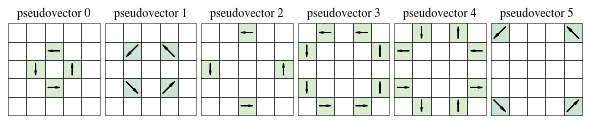

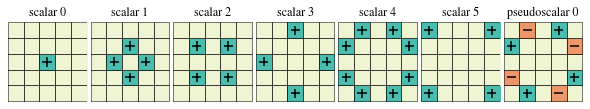

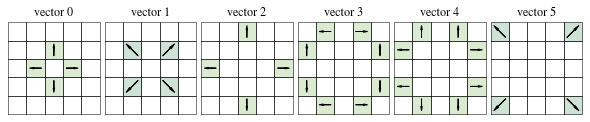

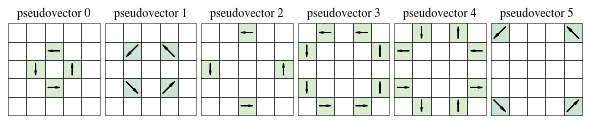

In [6]:
# Plot the 5x5 filters of tensor order 0,1 and parity 0 and 1.
N = 5
max_k = 1

allfilters_N5, maxn = geom.get_invariant_filters(
    [N], 
    range(max_k+1), 
    [0,1], 
    D, 
    group_operators, 
    scale='one', 
    return_maxn=True,
    return_type='list',
)

maxlen = 7
# 6 scalar filters + 1 pseudoscalar filter
names = [f'{geom.tensor_name(image.k, image.parity)} {i}' for i, image in zip(list(range(6)) + [0], allfilters_N5[:7])]
utils.plot_filters(allfilters_N5[:7], names, maxlen)
if save_plots:
    plt.savefig(save_folder + 'filters_m5_row1.pdf')

maxlen = 6
# 6 vector filters
names = [f'{geom.tensor_name(image.k, image.parity)} {i}' for i, image in enumerate(allfilters_N5[7:13])]
utils.plot_filters(allfilters_N5[7:13], names, maxlen)
if save_plots:
    plt.savefig(save_folder + 'filters_m5_row2.pdf')

# 6 pseudovector filters
names = [f'{geom.tensor_name(image.k, image.parity)} {i}' for i, image in enumerate(allfilters_N5[13:19])]
fig = utils.plot_filters(allfilters_N5[13:19], names, maxlen)
if save_plots:
    plt.savefig(save_folder + 'filters_m5_row3.pdf')

In [4]:
# make a sensible smooth scalar image on a 2-torus
N = 16
D = 2
np.random.seed(42)
image = np.random.normal(size=D * (N, ))
foo = np.pi * np.arange(-1. + 1. / N, 1., 2. / N)
ys, xs = np.meshgrid(foo, foo) # ys, xs or xs, ys??
ft = finufft.nufft2d1(xs.flatten(), ys.flatten(), image.flatten().astype(complex), (6, 5))
package = finufft.nufft2d2(xs.flatten(), ys.flatten(), ft).reshape(N, N).real
package -= np.mean(package)
package /= np.sqrt(np.mean(package ** 2))
scalar_image = geom.GeometricImage(package, 1, D)

In [13]:
filters = [
    (allfilters_N5[4], r"C_{s}"), 
    (allfilters_N3[3], r"C_{v}"), 
    (allfilters_N3[6], r"C_{pv}"), 
    (allfilters_N5[6], r"C_{ps}"),
]

In [15]:
monomials = {}
monomials[1] = [(scalar_image.normalize(), r"s"), ]
monomials[1] += [(scalar_image.convolve_with(ff).normalize(), r"s\ast " + tt) for ff, tt in filters]

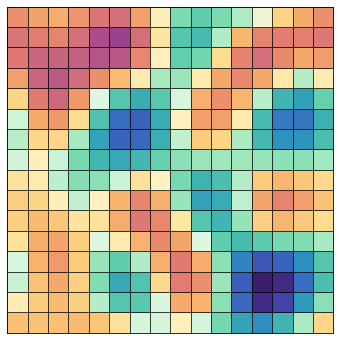

In [9]:
fig = utils.plot_image(monomials[1][0][0]) #scalar image
if save_plots:
    plt.savefig(save_folder + 'scalar_img.pdf', bbox_inches='tight')

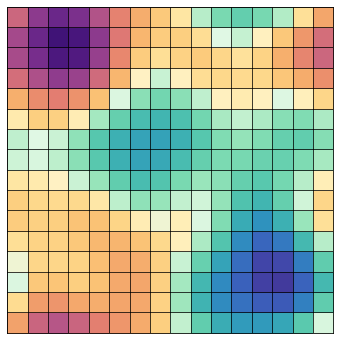

In [10]:
fig = utils.plot_image(monomials[1][1][0]) # scalar image convolved with scalar filter
if save_plots:
    plt.savefig(save_folder + 'scalar_img_convolved.pdf', bbox_inches='tight')

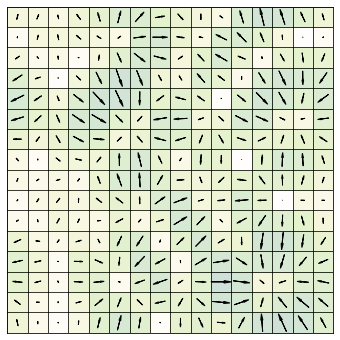

In [11]:
fig = utils.plot_image(monomials[1][2][0]) #scalar image convolved with vector filter
if save_plots:
    plt.savefig(save_folder + 'img_convolved_vector_ff.pdf', bbox_inches='tight')

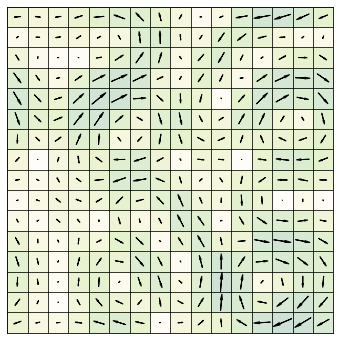

In [12]:
fig = utils.plot_image(monomials[1][3][0]) #scalar image convolved with pseudovector filter
if save_plots:
    plt.savefig(save_folder + 'img_convolved_pseudovector_ff.pdf', bbox_inches='tight')

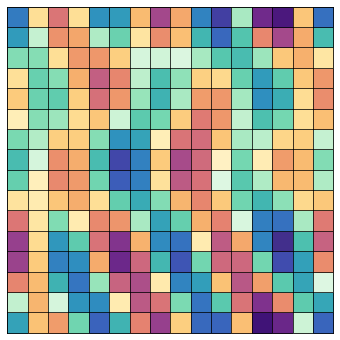

In [17]:
fig = utils.plot_image(monomials[1][4][0]) #scalar image convolved with pseudoscalar filter
if save_plots:
    plt.savefig(save_folder + 'img_convolved_pseudoscalar_ff.pdf', bbox_inches='tight')

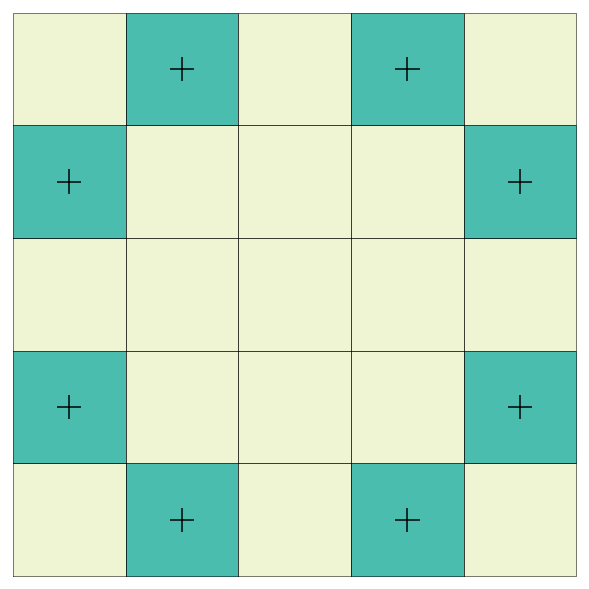

In [63]:
fig = utils.plot_filters([allfilters_N5[4]], [''], 1) # scalar filter
if save_plots:
    plt.savefig(save_folder + 'scalar_filter.pdf', bbox_inches='tight')

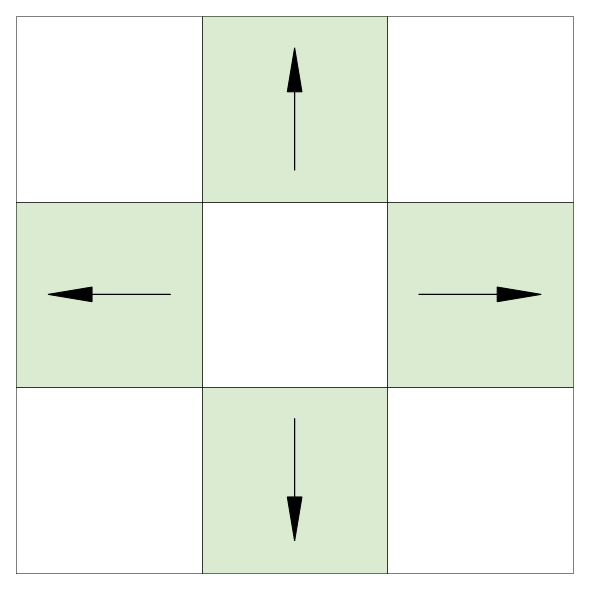

In [64]:
fig = utils.plot_filters([allfilters_N3[3]], [''], 1) # vector filter
if save_plots:
    plt.savefig(save_folder + 'vector_filter.pdf', bbox_inches='tight')

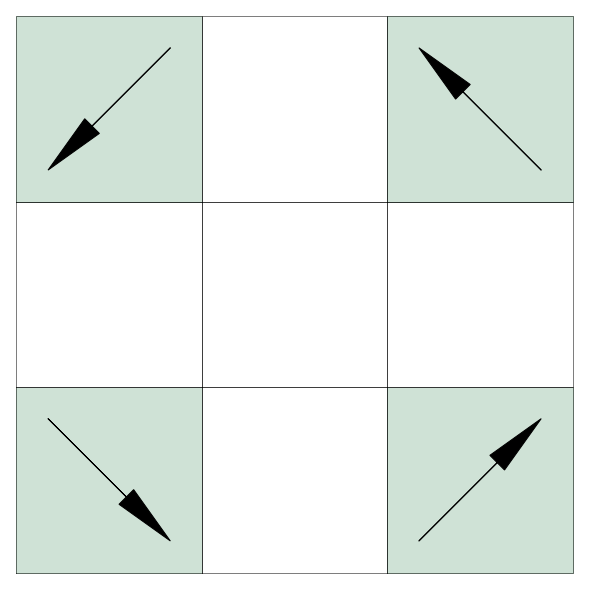

In [65]:
fig = utils.plot_filters([allfilters_N3[6]], [''], 1) # pseudovector filter
if save_plots:
    plt.savefig(save_folder + 'pseudovector_filter.pdf', bbox_inches='tight')

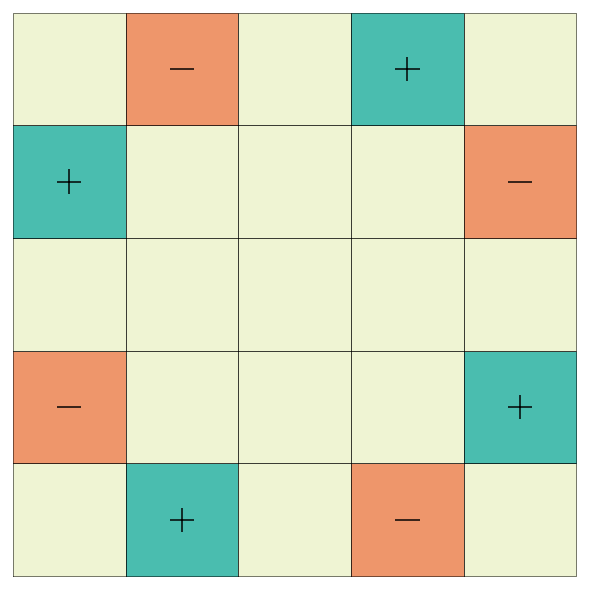

In [18]:
fig = utils.plot_filters([allfilters_N5[6]], [''], 1) # pseudoscalar filter
if save_plots:
    plt.savefig(save_folder + 'pseudoscalar_filter.pdf', bbox_inches='tight')

In [ ]:
# Plot the action of B_2 on a vector

def plot_vec(original_arrow, rotated_arrow, title, ax):
    ax.set_title(title)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')

    # remove the ticks from the top and right edges
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    
    ax.arrow(
        0,
        0,
        original_arrow[0],
        original_arrow[1], 
        length_includes_head=True,
        head_width= 0.24 * 0.33,
        head_length=0.72 * 0.33,
    )
    
    ax.arrow(
        0,
        0,
        rotated_arrow[0],
        rotated_arrow[1], 
        length_includes_head=True,
        head_width= 0.24 * 0.33,
        head_length=0.72 * 0.33,
        facecolor='red',
        edgecolor='black',
    )

sorted_operators = np.stack(group_operators)[[0,5,3,6,1,2,7,4]]
original_arrow = jnp.array([2,1])/jnp.linalg.norm(jnp.array([2,1]))
rotated_arrows = [gg @ original_arrow for gg in sorted_operators]
names = [
    'Identity', 
    r'Rot $90^{}$'.format('{\circ}'), 
    r'Rot $180^{}$'.format('{\circ}'), 
    r'Rot $270^{}$'.format('{\circ}'), 
    'Flip X', 
    'Flip Y', 
    r'Rot $90^{}$, Flip X'.format('{\circ}'),
    r'Rot $270^{}$, Flip X'.format('{\circ}'), 
]

num_rows = 2
num_cols = 4
bar = 8. # figure width in inches?
fig, axes = plt.subplots(num_rows, num_cols, figsize = (bar, 1.15 * bar * num_rows / num_cols), # magic
                         squeeze=False)
axes = axes.flatten()
plt.subplots_adjust(left=0.001/num_cols, right=1-0.001/num_cols, wspace=0.5/num_cols,
                    bottom=0.001/num_rows, top=1-0.001/m-0.1/num_rows, hspace=0.5/num_rows)

for i, rotated_arrow in enumerate(rotated_arrows):
    plot_vec(original_arrow, rotated_arrow, names[i], axes[i])
    
